## Import the needed libraries and dataset

In [4]:
import pandas as pd
import numpy as np

from utils.preprocess import *
from utils.LSTM import LSTM

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Device:  cuda


In [5]:
file_loc = "data/"

In [6]:
train_data = pd.read_csv(file_loc+"train.csv")
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
test_data = pd.read_csv(file_loc+"/test.csv")
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


## Data Preprocessing

In [8]:
# remove symbols, numbers, non-characters, new line, links, stopwords, and html tags
clean_data = clean(train_data.copy())
clean_data.head()

-------------
Cleaning data
-------------
Data cleaned!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why edits made username hardcore m...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww he matches background colour i'm seeming...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i'm really trying edit war it's guy co...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can't make real suggestions improvement...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir hero any chance remember page that's


In [9]:
# remove contractions in text
clean_data = decontract(clean_data)
clean_data.head()

------------------
Decontracting text
------------------
Texts decontracted!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,decontracted
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why edits made username hardcore m...,explanation why edits made username hardcore m...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww he matches background colour i'm seeming...,d'aww he matches background colour i am seemin...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i'm really trying edit war it's guy co...,hey man i am really trying edit war it is guy ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can't make real suggestions improvement...,more i cannot make real suggestions improvemen...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir hero any chance remember page that's,you sir hero any chance remember page that is


In [10]:
# lemmatize words in text
clean_data = lemmatize(clean_data)
clean_data.head()

----------------
Lemmatizing text
----------------
Text lemmatized!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,decontracted,lemmatized
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why edits made username hardcore m...,explanation why edits made username hardcore m...,explanation why edit make username hardcore m...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww he matches background colour i'm seeming...,d'aww he matches background colour i am seemin...,d'aww he match background colour i be seeming...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i'm really trying edit war it's guy co...,hey man i am really trying edit war it is guy ...,hey man i be really try edit war it be guy co...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can't make real suggestions improvement...,more i cannot make real suggestions improvemen...,more i cannot make real suggestion improvemen...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir hero any chance remember page that's,you sir hero any chance remember page that is,you sir hero any chance remember page that be


In [11]:
# split the train data into 80% train and 20% validation
X_train, X_val, y_train, y_val = split_data(clean_data)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

------------------
Splitting the data
------------------
Splitting done!


((127656,), (31915,), (127656, 6), (31915, 6))

In [12]:
# create an instance of the Summarize class
lstm = LSTM()

In [13]:
# tokenize the data
X_test = test_data['comment_text'].to_numpy().reshape(-1,)
X = clean_data["lemmatized"].to_numpy().reshape(-1,)

train_pad, val_pad, test_pad = lstm.tokenize(X, X_train, X_test, X_val)
train_pad.shape, test_pad.shape, val_pad.shape

((127656, 200), (153164, 200), (31915, 200))

## Toxic comment classification using LSTM

In [14]:
# build the model
model = lstm.build_model()

Building the model...
---------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           100000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 147,622
Trainable params: 147,622
Non-trainable params: 0
_________________________________________________________________
Done!


In [15]:
# compile the model
model = lstm.compile_model(model)

Compiling the model...
----------------------
Model compiled!


In [16]:
# train the model
history = lstm.train_model(model, train_pad, y_train, val_pad, y_val)

Training the model
------------------
Epoch 1/5
250/250 [==============================] - 28s 97ms/step - loss: 0.1607 - accuracy: 0.9350 - precision: 0.0288 - recall: 0.0015 - val_loss: 0.1364 - val_accuracy: 0.9940 - val_precision: 0.5500 - val_recall: 0.0016
Epoch 2/5
250/250 [==============================] - 9s 35ms/step - loss: 0.1023 - accuracy: 0.9931 - precision: 0.8115 - recall: 0.1861 - val_loss: 0.0720 - val_accuracy: 0.9941 - val_precision: 0.8421 - val_recall: 0.4358
Epoch 3/5
250/250 [==============================] - 7s 30ms/step - loss: 0.0646 - accuracy: 0.9942 - precision: 0.8031 - recall: 0.5525 - val_loss: 0.0628 - val_accuracy: 0.9941 - val_precision: 0.7697 - val_recall: 0.6313
Epoch 4/5
250/250 [==============================] - 6s 25ms/step - loss: 0.0590 - accuracy: 0.9942 - precision: 0.7992 - recall: 0.6013 - val_loss: 0.0588 - val_accuracy: 0.9941 - val_precision: 0.8293 - val_recall: 0.5802
Epoch 5/5
250/250 [==============================] - 7s 27ms/step

In [17]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.160672,0.935036,0.028772,0.001463,0.136372,0.993984,0.550000,0.001555
1,0.102325,0.993138,0.811518,0.186055,0.072024,0.994109,0.842120,0.435821
2,0.064582,0.994180,0.803112,0.552526,0.062834,0.994109,0.769735,0.631326
3,0.058998,0.994180,0.799194,0.601306,0.058767,0.994109,0.829258,0.580153
4,0.056808,0.994180,0.806492,0.615258,0.058684,0.994109,0.837308,0.585666


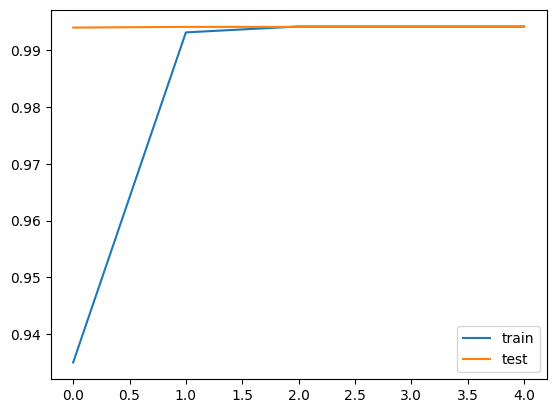

In [18]:
lstm.plot_accuracy(history)

In [19]:
lstm.get_accuracy(model, val_pad, y_val, train_pad, y_train)

Results:
--------
Training Accuracy: 99.42%

Training loss: 5.60%

Validation accuracy: 99.41%

Validation loss: 5.87%



In [20]:
# save the model 
lstm.save_model(model)

Model saved!


In [21]:
# load the saved model
model = lstm.load_model()

Model loaded!


In [22]:
# make predictions on test data
col_id = test_data['id']
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

pred_result = lstm.make_predictions(model, test_pad, col_id, labels)

4787/4787 [==============================] - 21s 4ms/step


In [23]:
pred_result.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.953167,0.216715,0.830312,0.063345,0.685299,0.140986
1,0000247867823ef7,0.657074,0.006096,0.176016,0.006531,0.201746,0.020372
2,00013b17ad220c46,0.082604,0.000917,0.019060,0.001809,0.025433,0.004451
3,00017563c3f7919a,0.011738,0.000040,0.001557,0.000198,0.002287,0.000405
4,00017695ad8997eb,0.027392,0.000279,0.005948,0.000901,0.009181,0.001881
